In [2]:
import pandas as pd
import geopy.distance
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import re
%matplotlib inline


llDF = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")
jobsOut = pd.read_csv("iowa-job-out.csv").drop(["Unnamed: 0"], axis=1)
jobsIn = pd.read_csv("iowa-work-flow.csv").drop(["Unnamed: 0"], axis=1)

ModuleNotFoundError: No module named 'mpl_toolkits'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


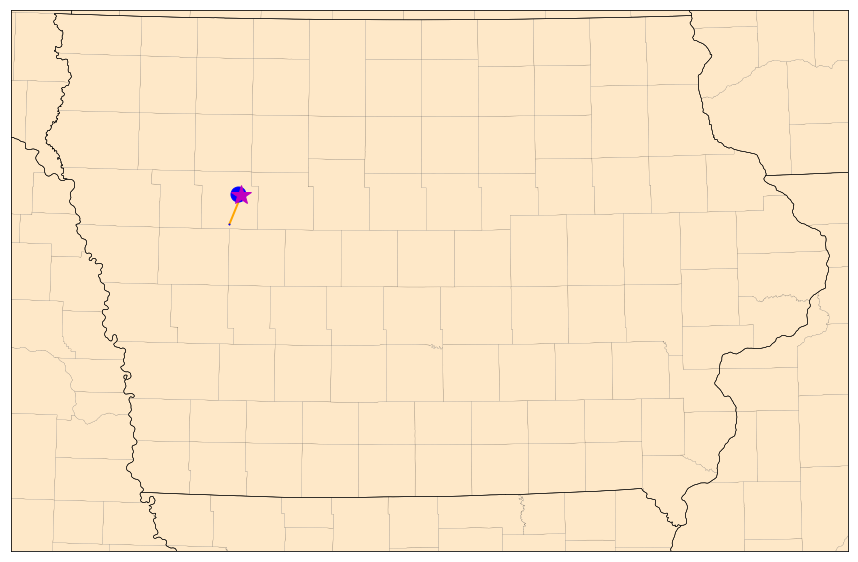

In [242]:
city = "Sac City, IA"

lat = [float(llDF[llDF["Unnamed: 0"] == city]["Lat"])]
lon = [float(llDF[llDF["Unnamed: 0"] == city]["Lon"])]

maxJobs = jobsIn[jobsIn["work city"] == city]["total jobs"].max()
maxCommuters = jobsOut[jobsOut["home city"] == city]["total jobs"].max()
maxNum = max(maxJobs, maxCommuters)

workerPlot = jobsIn[jobsIn["work city"] == city][jobsIn["total jobs"] > (maxJobs * 0.1)]
workerPlot = workerPlot[['home city', 'total jobs', 'lat home', 'lon home']]
workerPlot['weight'] = workerPlot['total jobs']/maxNum
workerPlot = workerPlot.drop(["total jobs"], axis=1)
workerPlot.columns = ["city", "lat", "lon", "weight"]

commuterPlot = jobsOut[jobsOut["home city"] == city][jobsOut["total jobs"] > (maxCommuters * 0.1)]
commuterPlot = commuterPlot[['work city', 'total jobs', 'lat work', 'lon work']]
commuterPlot['weight'] = commuterPlot['total jobs']/maxNum
commuterPlot = commuterPlot.drop(["total jobs"], axis=1)
commuterPlot.columns = ["city", "lat", "lon", "weight"]

def plotArc(row, m, c, z):
    x0, y0 = m(lon, lat)
    x1, y1 = m(row['lon'], row['lat'])
    lon0 = float(lon[0])
    lat0 = float(lat[0])
    lon1 = float(row['lon'])
    lat1 = float(row['lat'])
    w = int(row['weight'] * 15)
    m.plot(x1, y1, marker="o", color=c, markersize=w, zorder=z)
    m.drawgreatcircle(lon0, lat0, lon1, lat1, linewidth=2, color='orange')

fig=plt.figure(figsize=(15,15))
#ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-96.8,llcrnrlat=40.2,urcrnrlon=-89.9,urcrnrlat=43.5,
        projection='aeqd', lat_0=41.58, lon_0=-93.62)
#m = Basemap(projection='ortho', lat_0=41.58, lon_0=-93.62, resolution='l')

ax = plt.gca()

x, y = m(lon, lat)

m.readshapefile('st99_d00', name='states', drawbounds=True)
m.drawcounties(facecolor='#fee8c8')
workerPlot.apply(lambda x: plotArc(x, m, 'b', 9), axis=1)
#commuterPlot.apply(lambda x: plotArc(x, m, 'g', 8), axis=1)
m.plot(x, y, marker='*',color='m', markersize=20, zorder=10)
plt.show()
fig.savefig(re.sub("\W+", "_", city) + ".png")


In [232]:
edges.Label.unique()

array(['Pay-Day Loans', 'groceries', 'Pawn Shops', 'convenience stores',
       'restaurants', 'gas stations', 'optometrist', 'dollar store',
       'child care', 'pharmacy', 'dental', 'Check Cashing'], dtype=object)

In [1]:
city = "Elma, IA"

lat = [float(llDF[llDF["Unnamed: 0"] == city]["Lat"])]
lon = [float(llDF[llDF["Unnamed: 0"] == city]["Lon"])]

label = ["groceries", "dental", "optometrist", "pharmacy", "restaurants", "convenience stores", "gas stations"]
subset = edges[edges["City"] == city][edges["Label"].isin(label)].drop(["Label"], axis=1)
weights = pd.DataFrame(subset.sum()[1:])
weights.columns = ["weight"]
weights = weights[weights["weight"]>0]
maxWeight = float(weights.max())
weights["weight"] = weights["weight"] / maxWeight
weights = weights.reset_index()
weights.columns = ["city", "weight"]
weights["city"] = weights["city"].apply(lambda x: re.sub(", IA.*", ", IA", x))
weights = weights[weights["city"].str.contains(", IA")]
weights["lat"] = weights["city"].apply(lambda x: float(llDF[llDF["Unnamed: 0"] == x]["Lat"]))
weights["lon"] = weights["city"].apply(lambda x: float(llDF[llDF["Unnamed: 0"] == x]["Lon"]))

fig=plt.figure(figsize=(15,15))
#ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-96.8,llcrnrlat=40.2,urcrnrlon=-89.9,urcrnrlat=43.5,
        projection='aeqd', lat_0=41.58, lon_0=-93.62)
#m = Basemap(projection='ortho', lat_0=41.58, lon_0=-93.62, resolution='l')

ax = plt.gca()

x, y = m(lon, lat)

m.readshapefile('st99_d00', name='states', drawbounds=True)
m.drawcounties(facecolor='#fee8c8')
weights.apply(lambda x: plotArc(x, m, 'y', 9), axis=1)
#commuterPlot.apply(lambda x: plotArc(x, m, 'g', 8), axis=1)
m.plot(x, y, marker='*',color='m', markersize=20, zorder=10)
plt.show()
fig.savefig(re.sub("\W+", "_", city) + "SERVICE" + ".png")


NameError: name 'llDF' is not defined